<a href="https://colab.research.google.com/github/hibeyhan/hibeyhan/blob/main/Currency%20Futures%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim this code is to show an application for hedging financial positions with futures contract. A case study is analysed and final balances are calculated under different scenarios.

**Case:**

 On July 1st 2020, ABC company from US sells machinery to a German company and will receive € 3.78m in September 29th 2020. They expect that Euro will weaken against US Dollar, therefore, they choose to take a position in currency futures market to hedge their position. The current spot rate in the market is $1.1764/1€ and futures contracts at $1.170/1€ areavailable for delivery month.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

In [2]:
#Define class of future contracts
class Future:
    def __init__(self, enter_date, price, asset, size, expiry_date, tick, initial, maintain):
        #the day of entering contract i.e. "2021-08-23" as year-month-day
        self.enter_date=enter_date
        #price of contract
        self.price=price
        #underlying asset i.e. ""Eur""
        self.asset = asset
        #contract size of futures i.e. "125000"
        self.size = size  
        #termination day of contract  i.e. "2021/09/23" as year-month-day
        self.expiry_date=expiry_date
        #tick size of price move i.e. "0.001"
        self.tick = tick  
        #initial margin of contract i.e. "3000"
        self.initial=initial 
        #maintainence margin of contract i.e. "2200"
        self.maintain= maintain
        
    def timeToMaturity(self):
        eyear,emonth,eday=self.expiry_date.split("/")
        iyear,imonth,iday=self.enter_date.split("/")
        timeToMat=date(int(eyear),int(emonth),int(eday))-date(int(iyear),int(imonth),int(iday))
        timeToMat=timeToMat.days
        return timeToMat
    
    def getDates(self):
        timeStamp=[]
        eyear,emonth,eday=self.expiry_date.split("/")
        eyear=int(eyear)
        emonth=int(emonth)
        eday=int(eday)
        
        iyear,imonth,iday=self.enter_date.split("/")
        iyear=int(iyear)
        imonth=int(imonth)
        iday=int(iday)
        timeToMaturity=Future.timeToMaturity(self)

        for i in range(timeToMaturity + 1):
            days = pd.to_datetime(date(iyear,imonth,iday) + timedelta(days=i))
            timeStamp.append(days)   
        return timeStamp
            

        

We create a  future contract whose specifications are given by Future Class which is defined as Future (*contract_enter_date, price_on_contract, underlying_asset, contract_size, contract_expiry_date, tick_size, initial_margin, maintainance_margin*). Here, our future contract is Eurodollar and it is used to hedge Euro cash flow.

In [3]:
future1=Future("2021/7/01", 1.17,"EUR", 125000,"2021/9/24", 0.001, 3000, 2200)

A EUR/USD exchange rate is generated and simulated. Based on price generated, margin account can be tracked daily. Mark-to-market process is applied and the change in margin account is shown in Table 2.

In [4]:
#We generate a random decreasing price 
price=future1.price
maturity=future1.timeToMaturity()
priceGenerated=np.linspace(price, price-maturity*0.0005, maturity+1)+np.append(0,np.random.randn(maturity)/(2*maturity))

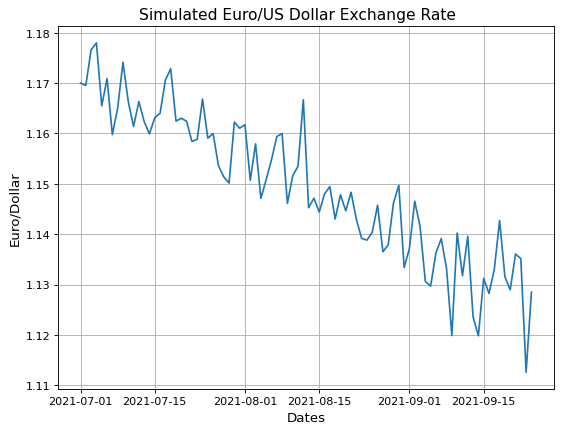

In [5]:
#We plot the price
fig=figure(figsize=(8, 6), dpi=80)
plt.plot(future1.getDates(),priceGenerated)
fig.suptitle('Simulated Euro/US Dollar Exchange Rate', fontsize=14, y=0.92)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Euro/Dollar', fontsize=12)
plt.grid()

In [6]:
# Mark_to_market process
ContractNumber=30

MarkToMarket=pd.DataFrame({"Dates": future1.getDates(),"Futures Price": priceGenerated,"Change in Value":"-", "Gain/Loss":"-", "Account Balance":ContractNumber*future1.initial})
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)

In [7]:
# Mark_to_market process
for i in range(maturity):
    if i==0:
        MarkToMarket["Change in Value"][i]="-"
        MarkToMarket["Gain/Loss"][i]="-"
    else:
        change=np.round(MarkToMarket["Futures Price"][i]-MarkToMarket["Futures Price"][i-1],4)
        MarkToMarket["Change in Value"][i]=change
        MarkToMarket["Gain/Loss"][i]=-round(change*ContractNumber*future1.size,1)
        MarkToMarket["Account Balance"][i]=round(MarkToMarket["Account Balance"][i-1]+MarkToMarket["Gain/Loss"][i])
        MarkToMarket["Account Balance"][maturity]="-"
    

In [8]:
#Change in Margin Account in  first 10 days of holding the contract
MarkToMarket.head(10)

,Dates,Futures Price,Change in Value,Gain/Loss,Account Balance
0,2021-07-01,1.170000,-,-,90000
1,2021-07-02,1.169552,-0.0004,1500,91500
2,2021-07-03,1.176613,0.0071,-26625,64875
3,2021-07-04,1.177990,0.0014,-5250,59625
4,2021-07-05,1.165485,-0.0125,46875,106500
5,2021-07-06,1.170896,0.0054,-20250,86250
6,2021-07-07,1.159769,-0.0111,41625,127875
7,2021-07-08,1.165019,0.0052,-19500,108375
8,2021-07-09,1.174146,0.0091,-34125,74250
9,2021-07-10,1.166357,-0.0078,29250,103500


In [9]:
#Change in Margin Account in  last 10 days of holding the contract
MarkToMarket.tail(10)

,Dates,Futures Price,Change in Value,Gain/Loss,Account Balance
76,2021-09-15,1.131248,0.0114,-42750,235125
77,2021-09-16,1.128235,-0.003,11250,246375
78,2021-09-17,1.132983,0.0047,-17625,228750
79,2021-09-18,1.142738,0.0098,-36750,192000
80,2021-09-19,1.131563,-0.0112,42000,234000
81,2021-09-20,1.128967,-0.0026,9750,243750
82,2021-09-21,1.136074,0.0071,-26625,217125
83,2021-09-22,1.135150,-0.0009,3375,220500
84,2021-09-23,1.112590,-0.0226,84750,305250
85,2021-09-24,1.128510,-,-,-


We can calculate gain/loss for different scenarios of spot rate at the date of futures contract is expired. Let \spot_scenarios\ be  [1.11,1.12,1.13,1.14,1.15,1.16, 1.17, 1.18, 1.19, 1.20, 1.21, 1.22, 1.23, 1.24]. Company could decide not to enter a future contract and go for spot rate, the total amount of US Dollars they receive would be:

In [10]:
SpotScenarios=np.round(np.array([1.11,1.12,1.13,1.14,1.15,1.16,1.17, 1.18, 1.19, 1.20, 1.22, 1.24]),decimals=2)
SpotFlow = 3750000*SpotScenarios
FutureFlow=np.round(3750000*(np.array(len(SpotScenarios)*[1.17])))
Scenarios=pd.DataFrame({"|Spot Price|":SpotScenarios, "|Cash Flow at Spot Rate|":SpotFlow, "|Cash Flow with Full Hedging|":FutureFlow})
Scenarios["|Total Gain/Loss|"]=Scenarios["|Cash Flow with Full Hedging|"]-Scenarios["|Cash Flow at Spot Rate|"]
Scenarios.style.hide_index().set_properties(**{'text-align': 'center'})
Scenarios

,|Spot Price|,|Cash Flow at Spot Rate|,|Cash Flow with Full Hedging|,|Total Gain/Loss|
0,1.11,4162500.0,4387500.0,225000.0
1,1.12,4200000.0,4387500.0,187500.0
2,1.13,4237500.0,4387500.0,150000.0
3,1.14,4275000.0,4387500.0,112500.0
4,1.15,4312500.0,4387500.0,75000.0
5,1.16,4350000.0,4387500.0,37500.0
6,1.17,4387500.0,4387500.0,0.0
7,1.18,4425000.0,4387500.0,-37500.0
8,1.19,4462500.0,4387500.0,-75000.0
9,1.20,4500000.0,4387500.0,-112500.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

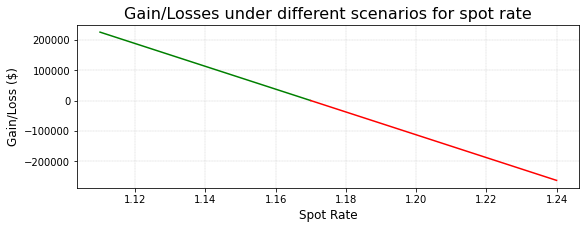

In [14]:
fig = plt.figure(figsize=(9,3))
fig.add_subplot(121)
ft2 = plt.axes()
ft2.plot(Scenarios["|Spot Price|"].head(7), Scenarios["|Total Gain/Loss|"].head(7), color='g')
ft2.plot(Scenarios["|Spot Price|"].tail(6), Scenarios["|Total Gain/Loss|"].tail(6), color='r')
plt.title("Gain/Losses under different scenarios for spot rate", fontsize=16)
plt.xlabel('Spot Rate', fontsize=12)
plt.ylabel('Gain/Loss ($)', fontsize=12)
plt.grid(linestyle = '--', linewidth = 0.3)
from google.colab import files
plt.savefig("abcff.png")
files.download("abcff.png") 


In [15]:
SpotPriceAtExpiry=priceGenerated[len(priceGenerated)-2]

Simulated exchange rate has price SpotPriceAtExpiry at expiry date. Hedging does not have to be full, it can be partial, so total gain/lose can be calculated under different hedge ratios.Hedge ratio refers to proportion of total amount hedged. A sensitivity analysis is made to calculate gain/loses for ten different cases from 0% to 100% of hedge ratio.

In [17]:
hedgeRatios=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
hedgeRatiosPercentage=100*np.array(hedgeRatios)
hedgeRatiosPercentage=list(hedgeRatiosPercentage)
totalFlow=[]
for i in range(len(hedgeRatios)):
    totalFlow.append(Scenarios["|Cash Flow with Full Hedging|"][0]*hedgeRatios[i]+ \
    (1-hedgeRatios[i])*Scenarios["|Cash Flow at Spot Rate|"][0])  
SensitivityAnalysis=pd.DataFrame({"Hedge Ratio (%)":hedgeRatiosPercentage,"Total Cash Flow ($)":totalFlow})
SensitivityAnalysis

,Hedge Ratio (%),Total Cash Flow ($)
0,0.0,4162500.0
1,10.0,4185000.0
2,20.0,4207500.0
3,30.0,4230000.0
4,40.0,4252500.0
5,50.0,4275000.0
6,60.0,4297500.0
7,70.0,4320000.0
8,80.0,4342500.0
9,90.0,4365000.0


Here we visualize gains under different hedge ratios with spot price at expiry.

Text(0, 0.5, 'Total Cash Flow ($) in millions')

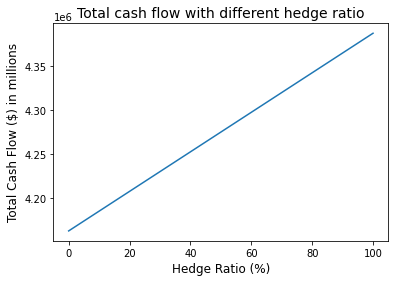

In [18]:
plt.plot(SensitivityAnalysis["Hedge Ratio (%)"], SensitivityAnalysis["Total Cash Flow ($)"])
plt.title('Total cash flow with different hedge ratio', fontsize=14)
plt.xlabel('Hedge Ratio (%)', fontsize=12)
plt.ylabel('Total Cash Flow ($) in millions', fontsize=12)
